1. Tích trong (Dot Product) – Audio Search

In [3]:
import numpy as np

signals = np.array([[1, 2], [3, 4], [10, 0]])
sample = np.array([3, -1])

result = np.inner(signals, sample)
print("Dot product result:", result)


Dot product result: [ 1  5 30]


1.1. Ứng dụng tìm chuỗi âm thanh (Audio search)

In [4]:
import numpy as np

A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])

# Tạo ma trận trượt
B = np.resize(np.array([[1]]), (len(A) - len(search_vector) + 1, len(search_vector)))
for i in range(len(B)):
    for j in range(len(search_vector)):
        B[i, j] = A[i + j]

# Tính dot product
C = np.inner(B, search_vector)

# Tìm vị trí khớp hoàn toàn
for i in range(len(C)):
    if C[i] == np.inner(search_vector, search_vector):
        print("Found at position:", i, "with window:", B[i])


Found at position: 6 with window: [ 0  1 -1]


1.2. Ứng dụng tạo ảnh mẫu & làm mờ ảnh
Tạo ảnh nhỏ (resize):

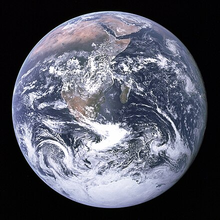

In [15]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/440px-The_Earth_seen_from_Apollo_17.jpg'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200 and 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content)).convert("RGB")
    new_img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)
    
    # Lưu ảnh vào file trong cùng thư mục với mã nguồn
    new_img.save("resized_image.jpg")

    # Hiển thị ảnh trong notebook (nếu dùng Jupyter)
    display(new_img)
else:
    print("Không tải được ảnh. Mã trạng thái:", response.status_code)
    print("Loại nội dung:", response.headers.get('Content-Type'))


Làm mờ ảnh:

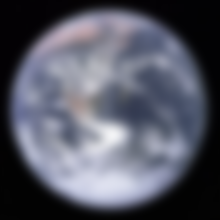

In [16]:
import requests
from PIL import Image, ImageFilter
from io import BytesIO
from IPython.display import display

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/440px-The_Earth_seen_from_Apollo_17.jpg'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200 and 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content)).convert("RGB")
    new_img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)
    
    # Làm mờ ảnh
    blurred_img = new_img.filter(ImageFilter.GaussianBlur(radius=5))
    
    # Lưu ảnh làm mờ vào file
    blurred_img.save("blurred_image.jpg")

    # Hiển thị ảnh đã làm mờ
    display(blurred_img)
else:
    print("Không tải được ảnh. Mã trạng thái:", response.status_code)
    print("Loại nội dung:", response.headers.get('Content-Type'))


2. PageRank – Xếp hạng trang web
Ma trận kết nối đơn giản:

In [7]:
import numpy as np

A = np.array([[0, 0, 1/2, 1/2],
              [1/3, 0, 0,   0],
              [1/3, 0, 0, 1/2],
              [1/3, 1, 1/2, 0]])

x = np.array([1.0, 1.0, 1.0, 1.0])
for i in range(10):
    x = np.dot(A, x)
    print(f"Lần {i+1}:", x)


Lần 1: [1.         0.33333333 0.83333333 1.83333333]
Lần 2: [1.33333333 0.33333333 1.25       1.08333333]
Lần 3: [1.16666667 0.44444444 0.98611111 1.40277778]
Lần 4: [1.19444444 0.38888889 1.09027778 1.32638889]
Lần 5: [1.20833333 0.39814815 1.06134259 1.33217593]
Lần 6: [1.19675926 0.40277778 1.06886574 1.33159722]
Lần 7: [1.20023148 0.39891975 1.06471836 1.3361304 ]
Lần 8: [1.20042438 0.40007716 1.06814236 1.3313561 ]
Lần 9: [1.19974923 0.40014146 1.06581951 1.3342898 ]
Lần 10: [1.20005466 0.39991641 1.06706131 1.33296762]


2.1.Đơn giản hóa thuật toán Pagerank

In [8]:
import numpy as np
A = np.array([[0,0,1.0/2, 1.0/2],
    [1.0/3,0,0,0],
    [1.0/3,0,0,1.0/2],
    [1.0/3,1.0,1.0/2,0]])
x = np.array([1,1,1,1]) 
print(x)

[1 1 1 1]


In [9]:
import numpy as np

x = np.array([1.0, 1.0, 1.0, 1.0])

A = np.array([[0.0, 1.0, 1.0/2, 1.0/4],
              [1.0/3, 0.0, 0.0, 1.0/4],
              [1.0/3, 0.0, 0.0, 1.0/4],
              [1.0/3, 1.0, 1.0/2, 1.0/4]])

for i in range(7):
    x = np.dot(A, x)
    print(i + 1, x)

1 [1.75       0.58333333 0.58333333 2.08333333]
2 [1.39583333 1.10416667 1.10416667 1.97916667]
3 [2.15104167 0.96006944 0.96006944 2.61631944]
4 [2.09418403 1.37109375 1.37109375 2.81119792]
5 [2.7594401  1.40086082 1.40086082 3.45750145]
6 [2.96566659 1.78418873 1.78418873 3.88547996]
7 [3.64765309 1.95992552 1.95992552 4.63620862]


# 2.3. [Đọc thêm] Xử lý nhánh web reducible

In [ ]:

import numpy as np

A = np.array([
    [0.0, 0.0, 1.0/2, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0/3, 0.0, 1.0/2, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0/3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0/3, 1.0/2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0/2, 0.0, 0.0, 1.0/2, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0/2, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0/2, 1.0, 0.0, 0.0, 1.0/2],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0/2, 0.0, 1.0/2]
])


N = 8

# Initialize vector x
x = np.array([1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N])

# Perform 7 iterations
for i in range(7):
    x = np.dot(A, x)
    print(i + 1, x)

1 [0.0625     0.10416667 0.04166667 0.10416667 0.125      0.0625
 0.25       0.125     ]
2 [0.02083333 0.04166667 0.02083333 0.07291667 0.11458333 0.03125
 0.23958333 0.09375   ]
3 [0.01041667 0.01736111 0.00694444 0.02777778 0.078125   0.015625
 0.19791667 0.0625    ]
4 [0.00347222 0.00694444 0.00347222 0.01215278 0.04774306 0.0078125
 0.12326389 0.0390625 ]
5 [0.00173611 0.00289352 0.00115741 0.00462963 0.02734375 0.00390625
 0.07335069 0.0234375 ]
6 [0.0005787  0.00115741 0.0005787  0.00202546 0.01511863 0.00195312
 0.04137731 0.01367188]
7 [0.00028935 0.00048225 0.0001929  0.0007716  0.00813802 0.00097656
 0.0229673  0.0078125 ]


In [11]:
import numpy as np

# Define d and N
d = 0.85
N = 8

x = np.array([1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N])


A = np.array([
    [0.0, 0.0, 1.0/2, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0/3, 0.0, 1.0/2, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0/3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0/3, 1.0/2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0/2, 0.0, 0.0, 1.0/2, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0/2, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0/2, 1.0, 0.0, 0.0, 1.0/2],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0/2, 0.0, 1.0/2]
])


M = d * A + ((1 - d) / N) * np.ones((N, N))

print("Matrix M:")
print(M)

Matrix M:
[[0.01875    0.01875    0.44375    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.01875    0.44375    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.01875    0.01875    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.44375    0.01875    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.44375    0.01875    0.01875    0.44375    0.01875
  0.01875    0.01875   ]
 [0.01875    0.01875    0.01875    0.01875    0.01875    0.44375
  0.01875    0.01875   ]
 [0.01875    0.01875    0.01875    0.44375    0.86875    0.01875
  0.01875    0.44375   ]
 [0.01875    0.01875    0.01875    0.01875    0.01875    0.44375
  0.01875    0.44375   ]]


# BÀI TẬP CHƯƠNG 2 

In [12]:
import numpy as np

# Ma trận kernel Gaussian chưa chuẩn hóa từ hình ảnh
gaussian_kernel_unnormalized = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

# Chuẩn hóa kernel bằng cách chia cho 256 (tổng của tất cả các phần tử là 256)
gaussian_kernel = gaussian_kernel_unnormalized / 256.0

print("Câu 1: Gaussian Blur Kernel (Ma trận làm mờ Gaussian đã chuẩn hóa)")
print(gaussian_kernel)

Câu 1: Gaussian Blur Kernel (Ma trận làm mờ Gaussian đã chuẩn hóa)
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


In [13]:
import numpy as np

# a. Kernel cho làm sắc nét/nổi bật cạnh (tổng các phần tử bằng 0)
# Đây là một kernel phát hiện cạnh cơ bản hoặc làm nổi bật các đường ngang và dọc.
kernel_a = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

print("Câu 2a: Kernel phát hiện/làm nổi bật cạnh (Tổng = 0)")
print(kernel_a)
print("Tổng các phần tử của kernel a:", np.sum(kernel_a))

# b. Kernel cho làm sắc nét tổng quát (tổng các phần tử bằng 1)
# Kernel này thường được dùng để làm tăng độ sắc nét tổng thể của hình ảnh.
kernel_b = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

print("\nCâu 2b: Kernel làm sắc nét tổng quát (Tổng = 1)")
print(kernel_b)
print("Tổng các phần tử của kernel b:", np.sum(kernel_b))

Câu 2a: Kernel phát hiện/làm nổi bật cạnh (Tổng = 0)
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
Tổng các phần tử của kernel a: 0

Câu 2b: Kernel làm sắc nét tổng quát (Tổng = 1)
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Tổng các phần tử của kernel b: 0
